# Some comments from homework 4

* Don't do lines too long, it's considered bad style as horizontal
scrolling is awkward. Most projects demand lines < 80 or, more rarely, < 100 chars.
 * This also helps the case when you want to compare two codes next to
 each other
* Include a space between argumenst for increased readability:
 * `Good: myfunc(a, b, c, d, e)`
 * `Bad:  myfunc(a,b,c,d,e)`
* Only use `elif` if there's another differing case to check. Otherwise, just use `else`.
* Help yourself by doing unit conversions before the actual equation.
 * Otherwise, already awkward looking equations become even harder to read.
* imports at top of module, not inside functions!
 * Makes the reader immediately understand the dependencies of your code.
 * This paradigm is being softened for parallel processing, where it becomes easier to send a logically complete function (with imports at beginning of function) to the different processors.

## Comments on HW 5
```python
Narr = [N(i) for i in xArr] # list comprehension, **NOT** okay for vectorial
```
is not the same as
```python
Narr = N(xArr)  # optimal
```
is not the same as
```python
Narr = np.exp(xArr**2/[....])   # kinda cheating...
```
And when the instructions say, call f() on each element of a vector, it means that.
So:
```python
xList = [f(i) for i in vector]
```

#### Q. Review:  what is the rank of $A_{i,j,k,l}$?

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as pl

####  little matplotlib config trick

As the colormap default is still the awful 'jet' colormap (creates artificial visual boundaries that don't exist in the data -> it fools you.), I want to switch the default to 'viridis'.

(exercise to the reader: this also can be done in a config file that is being read everytime matplotlib is being loaded!)

In [ ]:
from matplotlib import rcParams

Now, this config dictionary is huge:

In [ ]:
rcParams.keys()

In [ ]:
[key for key in rcParams.keys() if 'map' in key]

In [ ]:
rcParams['image.cmap']

In [ ]:
rcParams['image.cmap'] = 'viridis'

In [ ]:
rcParams['image.interpolation'] = 'none'

### Visualizing Multi-Dimensional Arrays

In [12]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
x

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

Q. What is the rank of x?

Q. What is the shape of x?

In [13]:
x.shape

(4, 3)

In [14]:
x.ndim

2

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


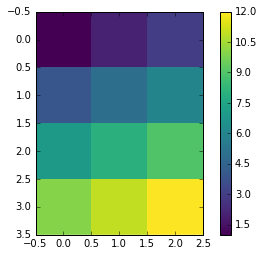

In [16]:
print(x)  # for reference
pl.imshow(x)
pl.colorbar();

Notice that the first row of the array was plotted 
at the top of the image.

This may be counterintuitive if when you think of 
row #0 you think of y=0, which in a normal x-y coordinate 
system is on the bottom.
    
This be changed using the "origin" keyword argument.

The reason for this is that this command was made for displaying 
CCD image data, and often the pixel (0,0) was considered to be the
one in the upper left.

But it also matches the standard print-out of arrays, so that's good as well.

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


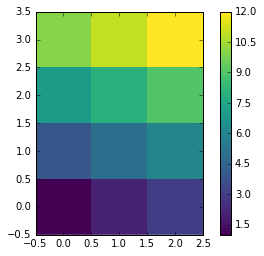

In [17]:
print(x)  # for reference
pl.imshow(x, origin='lower')
pl.colorbar();

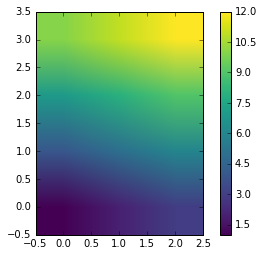

In [18]:
# Interpolation (by default) makes an image look 
# smoother.

# Instead:
pl.imshow(x, origin='lower', interpolation='bilinear')
pl.colorbar()

To look up other interpolations, just use the help feature.

And by the way, there shouldn't be any space after the question mark!

In [19]:
pl.imshow?

In [20]:
x # for reference

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [21]:
print(x)
print()
print(x.T)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]]


In [23]:
xT = x.T

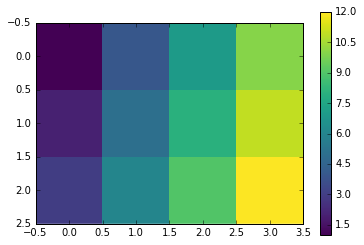

In [24]:
pl.imshow(xT)
pl.colorbar()

#### Q. And what should this yield?

In [25]:
xT.shape

(3, 4)

#### Arrays can be indexed in one of two ways:

In [26]:
xT  # Reminder

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

#### Q. What should this be?

In [ ]:
xT[2][1]

In [27]:
xT[2,1]

6

#### Can access x and y index information using numpy.indices:

In [29]:
xT

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

In [30]:
print(np.indices(xT.shape))

print("-" * 50)

for i in range(xT.shape[0]):
    for j in range(len(xT[0])):
        print(i, j)

[[[0 0 0 0]
  [1 1 1 1]
  [2 2 2 2]]

 [[0 1 2 3]
  [0 1 2 3]
  [0 1 2 3]]]
--------------------------------------------------
0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3


In [34]:
i, j = np.indices(xT.shape)

In [35]:
i

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2]])

In [36]:
j

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

#### Q. How to isolate the element in xT corresponding to i = 1 and j = 2?

In [37]:
xT

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

In [38]:
xT[1,2]

8

In [40]:
print(xT[np.logical_and(i == 1, j == 2)])

# Q. How did this work?
print(np.logical_and(i == 1, j == 2))

i == 1

[8]
[[False False False False]
 [False False  True False]
 [False False False False]]


array([[False, False, False, False],
       [ True,  True,  True,  True],
       [False, False, False, False]], dtype=bool)

#### Q. How about the *indices* of all even elements in xT?

In [41]:
xT # for reference

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

In [42]:
np.argwhere(xT % 2 == 0)

array([[0, 1],
       [0, 3],
       [1, 0],
       [1, 2],
       [2, 1],
       [2, 3]])

Note you only need this if you want to use these indices somewhere else, e.g. in another array of same shape.

Because if you just wanted the values, you of course would do that:

In [43]:
xT[xT % 2 == 0]

array([ 4, 10,  2,  8,  6, 12])

#### How to find particular elements in a 2-D array?

In [44]:
xT # for reference

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

In [45]:
np.argwhere(xT > 5)

array([[0, 2],
       [0, 3],
       [1, 2],
       [1, 3],
       [2, 1],
       [2, 2],
       [2, 3]])

In [46]:
xT

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

### Array Computing

In [49]:
xT

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

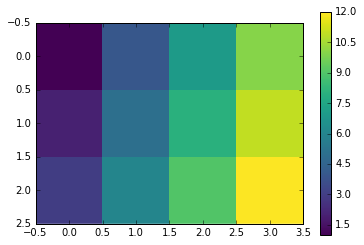

In [53]:
pl.imshow(xT)
pl.colorbar()
pl.clim(1, 12)        # colorbar limits, 
                      # analogous to xlim, ylim

[[ 6  9 12 15]
 [ 7 10 13 16]
 [ 8 11 14 17]]


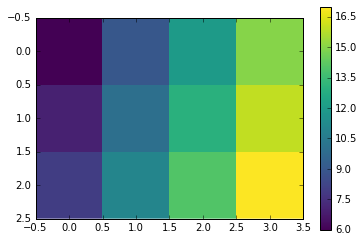

In [56]:
print(xT + 5)
pl.imshow(xT+5)
pl.colorbar()
# pl.clim(1, 12)    